In [1]:
import pandas as pd

import Clean_data as cld
import Transform_Data as tfd
import Visualize_Data as vld
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go


### Datasets

# Job Titles By Major

In [2]:
title_maj = pd.read_csv('Datasets/PeopleDataLabs/pdl_job_titles_by_major.csv')

In [3]:
title_maj.head(1)

,major,category,count,job_title_1,job_title_1_count,job_title_2,job_title_2_count,job_title_3,job_title_3_count,job_title_4,...,job_title_6,job_title_6_count,job_title_7,job_title_7_count,job_title_8,job_title_8_count,job_title_9,job_title_9_count,job_title_10,job_title_10_count
0,3d modelling,Sci_Eng_Related,299,3d artist,18.0,graphic designer,18.0,sales associate,12.0,creative director,...,intern,7.0,owner,7.0,designer,5.0,project engineer,5.0,3d modeler,4.0


very oddly formatted, with ranked degree into job counts

first fully manual step I'm needing to take is assigning higher-level buckets to these degrees

#### Cleaned

In [4]:
title_maj =  cld.get_degree_counts()
title_maj.head(5)

C:\Users\joshf\Notebooks\Capstone\Clean_data.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totals['title'] = 'total'
C:\Users\joshf\Notebooks\Capstone\Clean_data.py:140: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_list = totals.append(job1)
C:\Users\joshf\Notebooks\Capstone\Clean_data.py:141: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job_list = job_list.append(job2)
C:\Users\joshf\Notebooks\Capstone\Clean_data.py:142: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  job

,major,category,title,count
0,3d modelling,Sci_Eng_Related,3d artist,18.0
1,3d modelling,Sci_Eng_Related,3d modeler,4.0
2,3d modelling,Sci_Eng_Related,architect,9.0
3,3d modelling,Sci_Eng_Related,creative director,10.0
4,3d modelling,Sci_Eng_Related,designer,5.0


#### tscores

In [5]:
vld.run_ttest(title_maj, ['count'])

full length  11496
main df ttest Ttest_indResult(statistic=array([-0.15458576]), pvalue=array([0.87715044]))


In [6]:
title_maj['count'].value_counts()

1.0         1194
2.0          736
3.0          356
4.0          219
5.0          173
            ... 
8612.0         1
18854.0        1
549157.0       1
13201.0        1
94176.0        1
Name: count, Length: 3886, dtype: int64

#### Graphs

<AxesSubplot:ylabel='Density'>

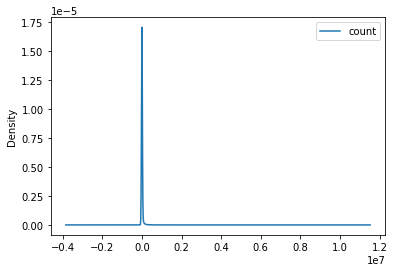

In [7]:
title_maj.plot.density()

This data, ungrouped trends very highly towards the low numbers. Grouping by category to move the dataset from individual job title to degree-level data

In [8]:
title_maj_grp = title_maj.groupby('category').sum()

fig = px.bar(title_maj_grp, x = title_maj_grp.index, y='count',
            title = 'Count(Millions) of Jobs obtained by degree Category'
            )

fig_widget = go.FigureWidget(fig)
fig_widget

FigureWidget({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'category=%{x}<br>count=…

# Degrees that Pay Back

In [9]:

payback_df = pd.read_csv('Datasets/Education Salaries/degrees-that-pay-back_edited.csv' )
payback_df.head(1)

,Undergraduate Major,Category,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,Business,46000,77100,0.676,42200,56100,108000,152000


#### Cleaned

In [10]:
payback_df = cld.get_degrees_pay_back()
payback_df.head(5)

,Undergraduate Major,Category,Starting Median Salary,Mid-Career Median Salary
0,Accounting,Business,46000,77100
1,Aerospace Engineering,Science and Engineering,57700,101000
2,Agriculture,Sci_Eng_Related,42600,71900
3,Anthropology,Sci_Eng_Related,36800,61500
4,Architecture,Sci_Eng_Related,41600,76800


#### tscores

In [11]:
vld.run_ttest(payback_df, ['Starting Median Salary', 'Mid-Career Median Salary'])

full length  50
main df ttest Ttest_indResult(statistic=array([-0.11594242, -0.21427168]), pvalue=array([0.90814478, 0.83117324]))


the payback dataset has much higher variability, which makes absolute sense since on top of higher min and max values, it's coming from a dataset of 50 rows.

#### Graphs

<AxesSubplot:ylabel='Density'>

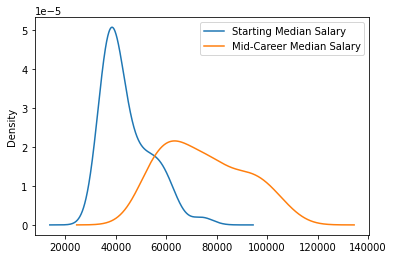

In [12]:
payback_df.plot.density()

In [13]:

fig = px.scatter(payback_df, x = 'Starting Median Salary', y='Mid-Career Median Salary',
            title = 'Starting Wage (x) vs Mid-Career Wage (y)',
                 color = payback_df['Category'],
                 trendline = 'ols'
            )

fig_widget = go.FigureWidget(fig)
fig_widget

FigureWidget({
    'data': [{'hovertemplate': ('Category=Business<br>Starting ' ... 'ian Salary=%{y}<extra></e…

Education and The Arts/Humanities etc have the lowest room for growth  and low mid-career caps

The other three though all have decently high room for growth. The zscores I calculated earlier do make sense, given some of the scattershot I'm seeing in this graph.

# Salaries by Region

In [14]:

reg_salaries = pd.read_csv('Datasets/Education Salaries/salaries-by-region.csv')
reg_salaries.head(3)

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,California,70400.0,129000.0,68400.0,93100.0,184000.0,257000.0
1,California Institute of Technology (CIT),California,75500.0,123000.0,NaN,104000.0,161000.0,NaN
2,Harvey Mudd College,California,71800.0,122000.0,NaN,96000.0,180000.0,NaN


The Regions, while useful, need a little cleaning.

#### Cleaned

In [15]:
u_reg_salaries = cld.get_ungrouped_regional_salaries()
u_reg_salaries.head(5)

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Stanford University,Western,70400.0,129000.0,68400.0,93100.0,184000.0,257000.0
1,California Institute of Technology (CIT),Western,75500.0,123000.0,NaN,104000.0,161000.0,NaN
2,Harvey Mudd College,Western,71800.0,122000.0,NaN,96000.0,180000.0,NaN
3,"University of California, Berkeley",Western,59900.0,112000.0,59500.0,81000.0,149000.0,201000.0
4,Occidental College,Western,51900.0,105000.0,NaN,54800.0,157000.0,NaN


In [16]:
reg_salaries = tfd.get_regional_salaries(u_reg_salaries)
reg_salaries.head(5)

,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
Region,,,,,,
Midwestern,44225.352113,78180.281690,43076.562500,57026.760563,107594.366197,147689.062500
Northeastern,48496.000000,91352.000000,49101.219512,65479.000000,129576.000000,181926.829268
Southern,44521.518987,79505.063291,43074.647887,57506.329114,109662.025316,152769.014085
Western,47061.428571,84172.857143,44867.857143,60810.000000,114555.714286,153285.714286


#### scores

In [17]:
u_reg_salaries = u_reg_salaries.dropna(axis = 0)
vld.run_ttest(u_reg_salaries, ['Starting Median Salary',
       'Mid-Career Median Salary', 'Mid-Career 10th Percentile Salary',
       'Mid-Career 25th Percentile Salary',
       'Mid-Career 75th Percentile Salary',
       'Mid-Career 90th Percentile Salary'])

full length  273
main df ttest Ttest_indResult(statistic=array([-1.03020195, -1.04650066, -0.1760127 , -0.84655679, -1.05975448,
       -1.49962868]), pvalue=array([0.30377364, 0.29620139, 0.86040681, 0.39794023, 0.29013815,
       0.13479845]))


there does seem to be a good amount of variation in this dataset, though the size of the set does lend itself to a good amount of variability.

#### Graphs

<AxesSubplot:ylabel='Density'>

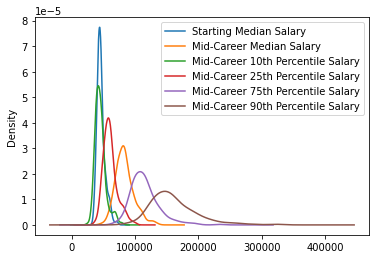

In [18]:
u_reg_salaries.plot.density()

In [19]:

fig = px.bar(reg_salaries,x = reg_salaries.columns,y = reg_salaries.index,
            title = 'State Starting Salaries', 
             barmode = 'group'
            )

fig_widget = go.FigureWidget(fig)
fig_widget

FigureWidget({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'variable=Starting Media…

Southern and Midwestern Regions paid the lowest, up until the 90th percentiles, where Southern regions paid  an average of 5,000 dollars more annually.

To capture the truest reflection of a typical worker looking for a job, I will not be using the last 4 percentile-based statistics.

Also, based on the way this is now grouped, it's a better fit for salary going forward

#### New Data

In [20]:
reg_salaries.to_csv('Final_Data/Further_Datasets/Regional_Salaries.csv')

# Salaries by College Type

In [21]:

col_type_salaries = pd.read_csv('Datasets/Education Salaries/salaries-by-college-type.csv')
col_type_salaries.head(3)

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,NaN,104000.0,161000.0,NaN
2,Harvey Mudd College,Engineering,71800.0,122000.0,NaN,96000.0,180000.0,NaN


In [22]:
col_type_salaries['School Type'].value_counts()

State           175
Liberal Arts     47
Party            20
Engineering      19
Ivy League        8
Name: School Type, dtype: int64

This unfortunately isn't the *type* of college I was anticipating. I would cherry pick liberal arts and engineering but... that *would* be cherry picking

#### Cleaned

Can't, Won't

#### tscores

#### Graphs